In [22]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

random forest models modified. changed criterion to absolute error

In [23]:
def add_t_minus(df, n):
    if n == 0:
        return df
    df_res = df.copy()
    for i in range(1,n+1):
        df_shifted = df.shift(i)
        for cname in df_shifted.columns:
            df_shifted.rename(columns = {cname:cname+'_'+str(i)}, inplace = True)
        df_res = df_res.join(df_shifted)
    df_res = df_res.interpolate(method='spline', limit_direction='backward', order=1)
    return df_res

def preprocess_data(features, labels=None, tminus=0):

    if labels is not None:pandas add month colum from dateinus=0):
    if labels_path is not None:
        labels = pd.read_csv(labels_path,
                           index_col=[0,1,2])

    features = pd.read_csv(features_path,
                             index_col=[0,1,2],
                             parse_dates=['week_start_date'])

    # Separate data for San Juan
    sj_features = features.loc['sj']
    if labels_path is not None:
        sj_labels = labels.loc['sj']

    # Separate data for Iquitos
    iq_features = features.loc['iq']
    if labels_path is not None:
        iq_labels = labels.loc['iq']

    if labels_path is not None:
        sj_f, sj_l = preprocess_data(sj_features, sj_labels, tminus)
        iq_f, iq_l = preprocess_data(iq_features, iq_labels, tminus)
        return sj_f, sj_l, iq_f, iq_l

    return preprocess_data(sj_features, None, tminus), preprocess_data(iq_features, None, tminus)


In [24]:
tminus = 0
sj_X_train, sj_y_train, iq_X_train, iq_y_train = get_data('dengue_features_train.csv',
                                                        'dengue_labels_train.csv',tminus=tminus)

# load the provided data
train_features = pd.read_csv('dengue_features_train.csv',
                             index_col=[0,1,2],
                             parse_dates=['week_start_date'])

train_labels = pd.read_csv('dengue_labels_train.csv',
                           index_col=[0,1,2])

# Separate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

sj_X_train, sj_y_train = preprocess_data(sj_train_features,sj_train_labels)

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

iq_X_train, iq_y_train = preprocess_data(iq_train_features,iq_train_labels)

In [25]:
#split data in train and test
sj_X_train, sj_X_test, sj_y_train, sj_y_test = train_test_split(
    sj_X_train, sj_y_train, test_size=0.3, shuffle=False)

iq_X_train, iq_X_test, iq_y_train, iq_y_test = train_test_split(
iq_X_train, iq_y_train, test_size=0.3, shuffle=False)


In [26]:
sj_X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
weekofyear,655.0,26.810687,14.858483,1.000000,14.000000,27.000000,40.000000,53.000000
ndvi_ne,655.0,0.085308,0.085051,-0.290200,0.042304,0.082313,0.120275,0.446267
ndvi_nw,655.0,0.096682,0.078717,-0.130950,0.050250,0.090200,0.134000,0.437100
ndvi_se,655.0,0.181044,0.054837,0.036000,0.146207,0.178579,0.212529,0.393129
ndvi_sw,655.0,0.168472,0.055406,-0.063457,0.134221,0.169529,0.203043,0.381420
precipitation_amt_mm,655.0,34.314218,41.118100,0.000000,0.925000,21.530000,50.610000,287.550000
reanalysis_air_temp_k,655.0,299.024423,1.178127,295.938571,298.041429,299.227143,299.980714,301.255714
reanalysis_avg_temp_k,655.0,299.132212,1.155346,296.114286,298.182143,299.321429,300.053571,301.407143
reanalysis_dew_point_temp_k,655.0,295.067408,1.566198,289.642857,293.840714,295.447143,296.355714,297.467143
reanalysis_max_air_temp_k,655.0,301.260198,1.195158,298.200000,300.400000,301.400000,302.300000,303.900000


In [27]:
iq_X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
weekofyear,364.0,26.431319,14.973924,1.000000,13.750000,26.000000,39.000000,53.000000
ndvi_ne,364.0,0.267275,0.080754,0.090057,0.205348,0.267742,0.323432,0.488400
ndvi_nw,364.0,0.234158,0.075866,0.035860,0.178618,0.227623,0.289986,0.428771
ndvi_se,364.0,0.251609,0.076012,0.029880,0.195429,0.250836,0.305218,0.473400
ndvi_sw,364.0,0.264409,0.083300,0.064183,0.207045,0.262350,0.321064,0.546017
precipitation_amt_mm,364.0,64.398548,34.978370,0.000000,39.452500,60.850000,86.507500,173.450000
reanalysis_air_temp_k,364.0,297.860472,1.191263,294.635714,297.063929,297.830714,298.588214,301.637143
reanalysis_avg_temp_k,364.0,299.134407,1.343357,294.892857,298.221429,299.139286,300.101786,302.928571
reanalysis_dew_point_temp_k,364.0,295.319266,1.477738,290.088571,294.344643,295.740000,296.457857,297.852857
reanalysis_max_air_temp_k,364.0,307.199831,2.442915,300.000000,305.200000,307.200000,308.900000,314.000000


In [28]:
# compute the correlations
sj_correlations = sj_X_train.corr()
iq_correlations = iq_X_train.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

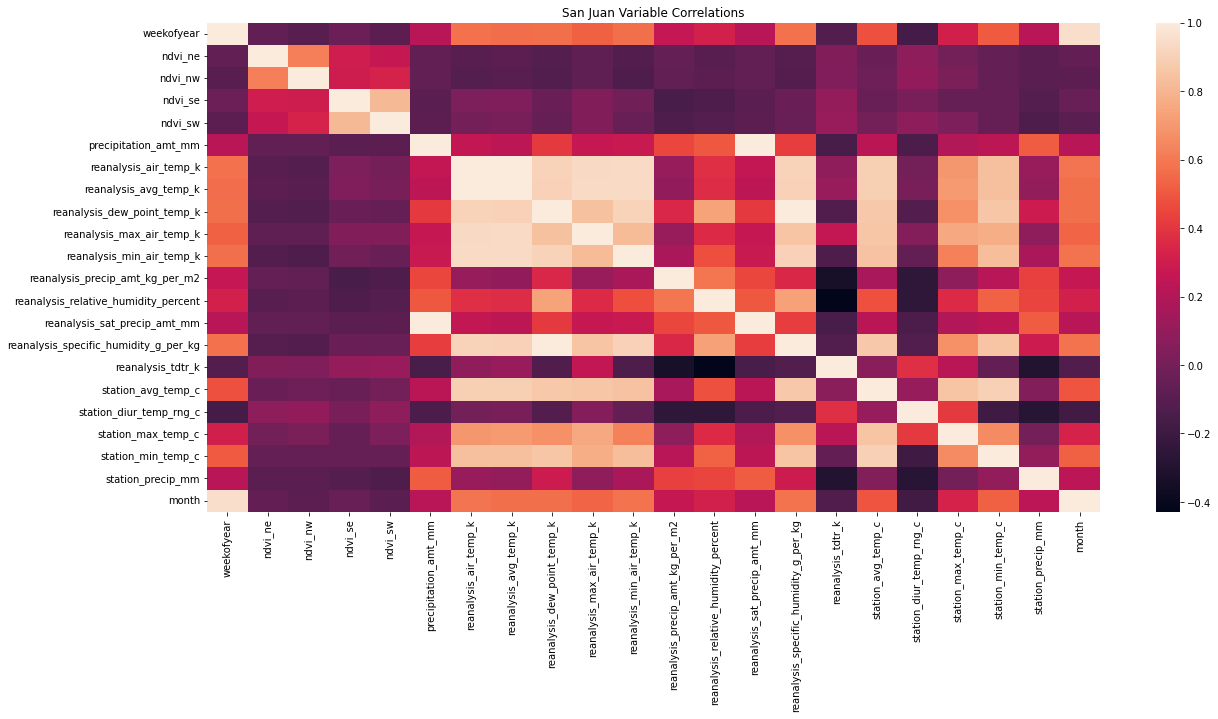

In [29]:
plt.rcParams["figure.figsize"] = (20,9)

# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

In [30]:
'''sj_rf = RandomForestRegressor(  n_estimators = 100, 
                                min_samples_leaf=25, 
                                criterion='absolute_error',
                                max_depth = 4)'''

sj_rf = RandomForestRegressor(  n_estimators = 50,
                                min_samples_leaf=5,
                                criterion='absolute_error',
                                )                               
sj_rf.fit(sj_X_train, sj_y_train)
print(mean_absolute_error(sj_y_train, sj_rf.predict(sj_X_train)))
print(mean_absolute_error(sj_y_test, sj_rf.predict(sj_X_test)))

16.50732824427481
20.48544483985765


In [31]:
sj_rf.feature_importances_

array([0.23263677, 0.15741191, 0.08592181, 0.0419152 , 0.04554443,
       0.00992714, 0.02176924, 0.01878458, 0.03788311, 0.02031048,
       0.01664906, 0.02739141, 0.02187187, 0.015367  , 0.03624003,
       0.02252487, 0.03098162, 0.02936141, 0.02063573, 0.01156162,
       0.02836732, 0.06694339])

<AxesSubplot:ylabel='cols'>

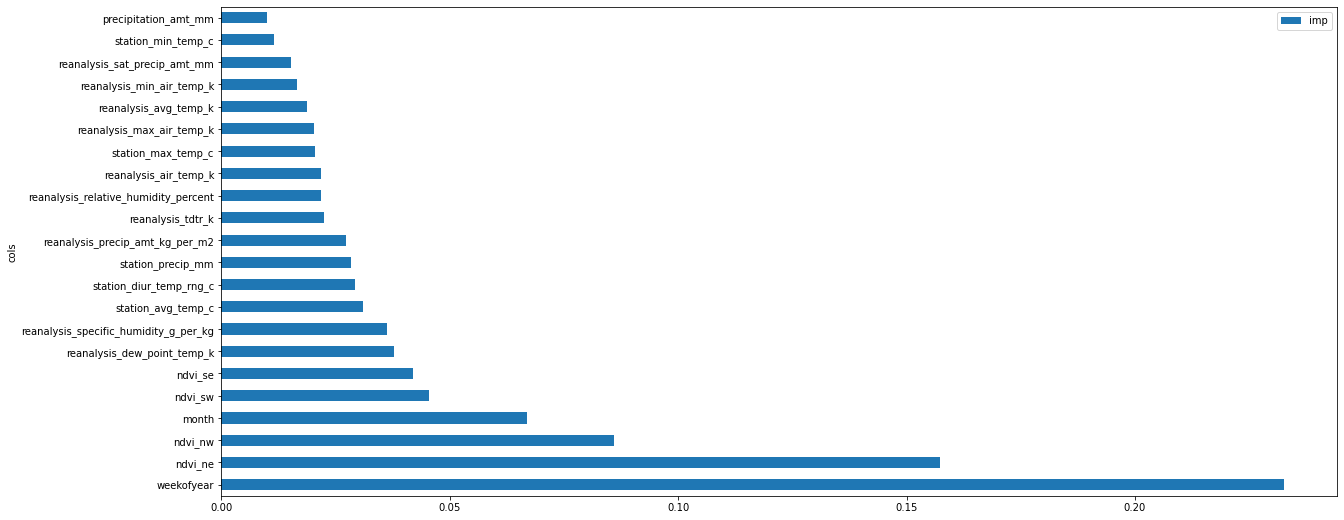

In [32]:
plt.rcParams["figure.figsize"] = (20,9)
(pd.DataFrame(dict(cols=sj_X_train.columns, imp=sj_rf.feature_importances_))
    .sort_values('imp', ascending=False)
    .plot('cols', 'imp', 'barh')
)

In [33]:
iq_rf =  RandomForestRegressor( n_estimators = 50, 
                                min_samples_leaf=5, 
                                criterion='absolute_error',
                                )

'''iq_rf = RandomForestRegressor(  n_estimators = 100,
                                min_samples_leaf=25,
                                criterion='absolute_error',)  '''
iq_rf.fit(iq_X_train, iq_y_train)
print(mean_absolute_error(iq_y_train, iq_rf.predict(iq_X_train)))
print(mean_absolute_error(iq_y_test, iq_rf.predict(iq_X_test)))

4.125521978021978
7.593782051282051


In [34]:
iq_rf.feature_importances_

array([0.03942025, 0.02364796, 0.02545329, 0.03161818, 0.03066099,
       0.02645717, 0.01477831, 0.01508022, 0.18282599, 0.03189368,
       0.03707586, 0.05613332, 0.04051428, 0.02581341, 0.12478436,
       0.02835913, 0.04103006, 0.09305734, 0.02880803, 0.04267731,
       0.02539744, 0.03451345])

<AxesSubplot:ylabel='cols'>

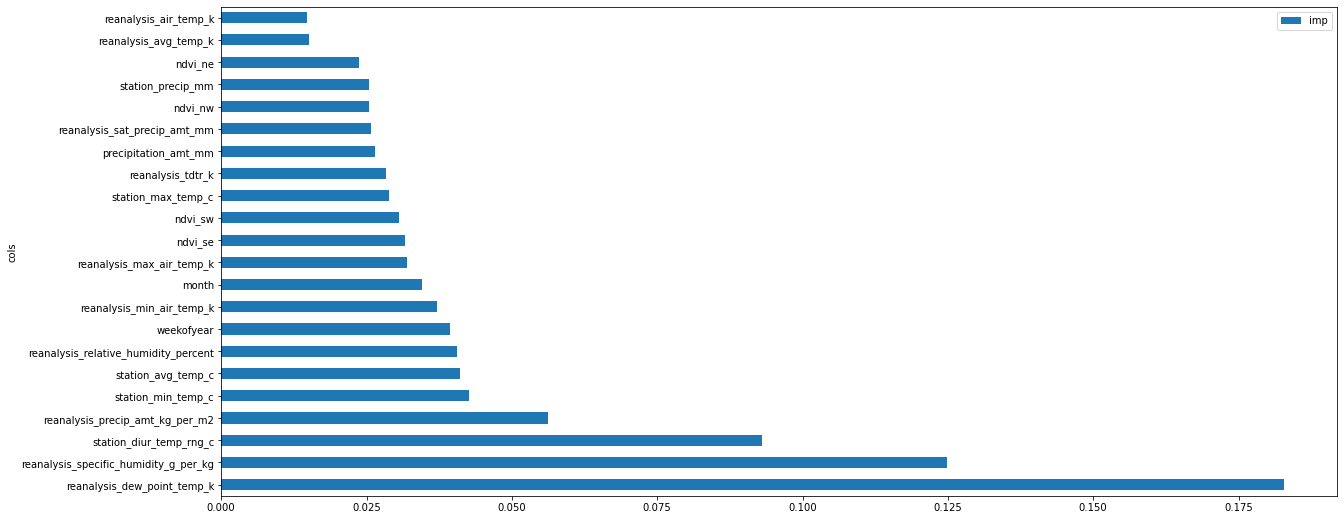

In [35]:
plt.rcParams["figure.figsize"] = (20,9)
(pd.DataFrame(dict(cols=iq_X_train.columns, imp=iq_rf.feature_importances_))
    .sort_values('imp', ascending=False)
    .plot('cols', 'imp', 'barh')
)

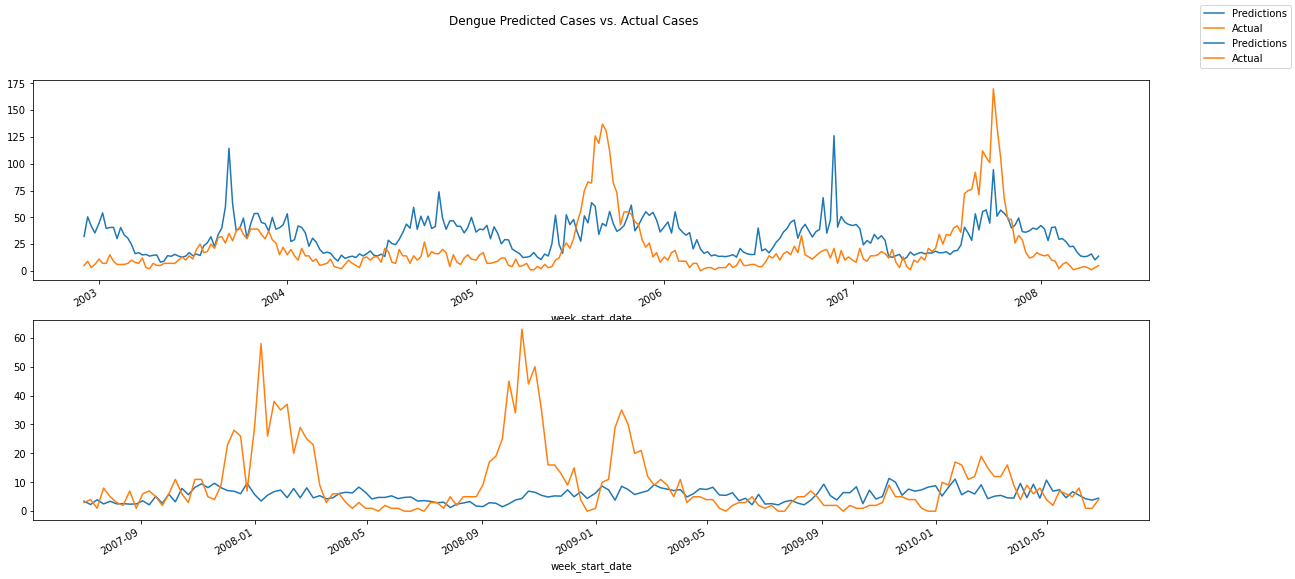

In [36]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_X_test['fitted'] = sj_rf.predict(sj_X_test)
sj_X_test.fitted.plot(ax=axes[0], label="Predictions")
sj_y_test.plot(ax=axes[0], label="Actual")

iq_X_test['fitted'] = iq_rf.predict(iq_X_test)
iq_X_test.fitted.plot(ax=axes[1], label="Predictions")
iq_y_test.plot(ax=axes[1], label="Actual")

figs.suptitle("Dengue Predicted Cases vs. Actual Cases")
figs.legend()

In [37]:
sj_X_test.drop('fitted',axis=1,inplace=True)
iq_X_test.drop('fitted',axis=1,inplace=True)

In [38]:
#submit data
sj_X_valid, iq_X_valid = get_data('dengue_features_test.csv',tminus=tminus) 

/tmp/ipykernel_280953/1229941035.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['month'] = features['week_start_date'].dt.month
/tmp/ipykernel_280953/1229941035.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['month'] = features['week_start_date'].dt.month


In [39]:
sj_X_valid

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month
week_start_date,,,,,,,,,,,,,,,,,,,,,
2008-04-29,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4
2008-05-06,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,5
2008-05-13,20,-0.001500,0.061357,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,5
2008-05-20,21,0.072478,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,5
2008-05-27,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-26,13,-0.087400,-0.016183,0.156343,0.105186,30.34,298.670000,298.885714,294.675714,301.3,...,78.780000,30.34,15.985714,3.314286,27.542857,7.942857,33.9,22.8,3.5,3
2013-04-02,14,-0.203250,-0.077833,0.204171,0.178914,6.55,298.035714,298.157143,294.628571,301.5,...,81.650000,6.55,15.881429,2.828571,26.642857,6.642857,33.3,22.8,17.6,4
2013-04-09,15,-0.117600,-0.008200,0.192700,0.170429,0.00,299.057143,299.328571,294.948571,301.5,...,78.285714,0.00,16.212857,3.171429,27.914286,8.114286,32.8,23.3,9.4,4


In [40]:
iq_X_valid

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month
week_start_date,,,,,,,,,,,,,,,,,,,,,
2010-07-02,26,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,307.9,...,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2,7
2010-07-09,27,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,307.7,...,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9,7
2010-07-16,28,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,306.4,...,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6,7
2010-07-23,29,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,306.4,...,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8,7
2010-07-30,30,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,308.1,...,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-28,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,...,89.990000,41.12,17.185714,10.100000,27.400,9.050,32.6,21.8,33.0,5
2013-06-04,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,...,93.891429,71.52,17.448571,9.657143,27.520,10.720,33.8,21.4,68.0,6
2013-06-11,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,...,94.967143,78.96,16.410000,7.385714,27.200,10.075,32.6,21.6,93.2,6


In [41]:
sj_predictions = sj_rf.predict(sj_X_valid).astype(int)
iq_predictions = iq_rf.predict(iq_X_valid).astype(int)

submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("benchmark.csv")

In [42]:
print('sj', mean_absolute_error(sj_y_test, sj_rf.predict(sj_X_test)))
print('iq', mean_absolute_error(iq_y_test, iq_rf.predict(iq_X_test)))

sj 20.48544483985765
iq 7.593782051282051
